In [1]:
# Dependencies
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

### Data preparation

* Read `crypto_data.csv` into Pandas. The dataset was obtained from [CryptoCompare](https://min-api.cryptocompare.com/data/all/coinlist).

In [2]:
# Read in csv and covert to dataframe
file_path = Path("data/crypto_data.csv")
crypto_df = pd.read_csv(file_path,index_col = 0)
crypto_df.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [3]:
# EDA
crypto_df.shape

(1252, 6)

* Discard all cryptocurrencies that are not being traded. In other words, filter for currencies that are currently being traded. Then, drop the `IsTrading` column from the dataframe.

In [4]:
# filter for currencies that are currently being traded
crypto_trading = crypto_df[crypto_df.IsTrading == True]

# drop the `IsTrading` column from the dataframe.
crypto_trading = crypto_trading.drop(columns=['IsTrading'])
crypto_trading

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...
SERO,Super Zero,Ethash,PoW,NaN,1000000000
UOS,UOS,SHA-256,DPoI,NaN,1000000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [5]:
# drop NA
crypto_trading.dropna(inplace=True)
crypto_trading

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...
ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [6]:
# Filter the total coins mined greater than zero
crypto_mined = crypto_trading[crypto_trading.TotalCoinsMined > 0]
crypto_mined

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...
ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [7]:
# Save Coin Name in a separate table 
CoinName = crypto_mined.filter(['CoinName'], axis=1)
# Drop the CoinName column
crypto_mined2 = crypto_mined.drop(['CoinName'], axis=1)
labels = crypto_mined['CoinName']

* In order for the dataset to be comprehensible to a machine learning algorithm, its data should be numeric. Since the coin names do not contribute to the analysis of the data, delete the `CoinName` from the original dataframe.

### Pandas get_dummies
* Convert the remaining features with text values, `Algorithm` and `ProofType`, into numerical data. 

In [8]:
# convert Algorithm and ProofType into numerical data
crypto_data = pd.get_dummies(crypto_mined2, columns=['Algorithm', 'ProofType'])
crypto_data


,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZEPH,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GAP,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BDX,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZEN,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### StandardScaler
* Standardize the dataset so that columns that contain larger values do not unduly influence the outcome.

In [9]:
# Standardize your dataset 
scale = StandardScaler()
crypto_scaled = scale.fit_transform(crypto_data)
crypto_scaled

array([[-0.11710817, -0.1528703 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.09396955, -0.145009  , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.52494561,  4.48942416, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       ...,
       [-0.09561336, -0.13217937, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11694817, -0.15255998, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11710536, -0.15285552, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ]])

### Dimensionality Reduction

### PCA

In [10]:
# Using PCA to reduce to 4 dimensions (three principal components)
n = 73
pca = PCA(n_components = n)

crypto_pca = pca.fit_transform(crypto_scaled)
crypto_pca

array([[-3.35125284e-01,  1.03266037e+00, -5.90248784e-01, ...,
        -4.55492260e-07, -3.04115675e-06,  1.22195992e-03],
       [-3.18460446e-01,  1.03280102e+00, -5.90662374e-01, ...,
        -2.93937207e-07, -1.49619504e-06,  1.22055987e-03],
       [ 2.30526357e+00,  1.64964558e+00, -6.87682515e-01, ...,
        -5.20661321e-08, -3.70073826e-05,  1.10578916e-02],
       ...,
       [ 3.24421251e-01, -2.30991644e+00,  4.22794086e-01, ...,
        -1.55155417e-06, -9.20268177e-06,  2.43187167e-03],
       [-1.49595012e-01, -2.05428579e+00,  4.09091915e-01, ...,
        -8.32272780e-08, -2.82260024e-06, -1.80174423e-04],
       [-2.89997198e-01,  8.17993972e-01, -2.79796330e-01, ...,
        -3.99031651e-07, -3.78969644e-05, -5.04909530e-04]])

In [11]:
# explained_variance_ratio AND explained_variance_
print(f'The explained variance ratio: {pca.explained_variance_ratio_}')
# print(f'The explained variance : {pca.explained_variance_}')

The explained variance ratio: [0.0279317  0.02141793 0.02051609 0.02044661 0.02044658 0.02044657
 0.02044644 0.02042552 0.01870901 0.01756281 0.01741094 0.01628941
 0.01596136 0.01551128 0.01434991 0.0132091  0.0123654  0.01204709
 0.01104099 0.01071303 0.01048944 0.01040648 0.01038997 0.01037702
 0.01034873 0.01033724 0.01029558 0.0102815  0.01028105 0.01027942
 0.01027832 0.0102753  0.01026884 0.01026308 0.01026064 0.0102546
 0.0102533  0.01025019 0.01024879 0.01024257 0.01024229 0.01024202
 0.01023801 0.01023625 0.01023508 0.01023354 0.01022983 0.01022438
 0.0102233  0.0102233  0.0102233  0.0102233  0.0102233  0.0102233
 0.0102233  0.0102233  0.0102233  0.0102233  0.0102233  0.0102233
 0.0102233  0.0102233  0.0102233  0.0102233  0.0102233  0.0102233
 0.0102233  0.0102233  0.0102233  0.0102233  0.0102233  0.0102233
 0.01022262]


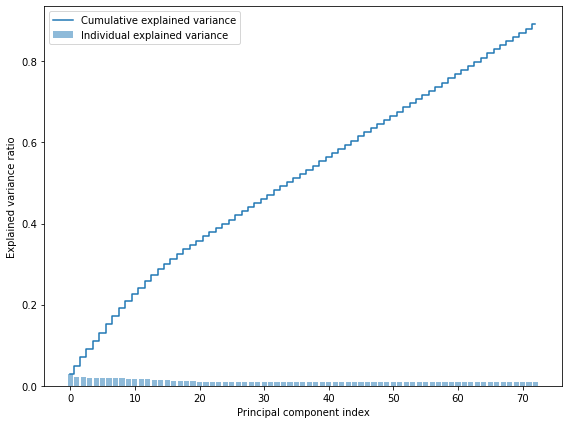

In [12]:
exp_var_pca = pca.explained_variance_ratio_
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
plt.figure(figsize=(8,6))
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')


plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

**With 73principal component, we are able to preserve 90% of the explained variance in dimensionality reduction.**

### TSNE
* Further reduce the dataset dimensions with t-SNE and visually inspect the results.
* Run t-SNE on the principal components: the output of the PCA transformation. Then create a scatter plot of the t-SNE output. Observe whether there are distinct clusters or not.

In [13]:
tsne = TSNE(n_components=2, random_state=42, n_iter=1000)
crypto_TSNE = tsne.fit_transform(crypto_pca)
crypto_TSNE.shape

(532, 2)

In [14]:
crypto_mined2['x'] = crypto_TSNE[:, 0]
crypto_mined2['y'] = crypto_TSNE[:, 1]

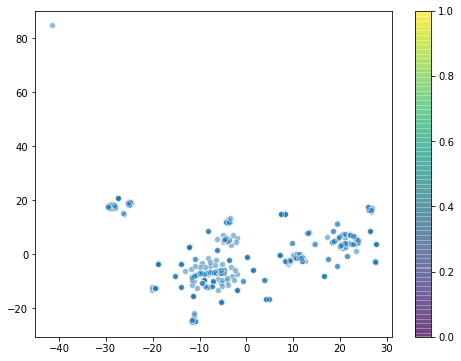

In [15]:
plt.figure(figsize=(8,6))
plt.scatter('x', 'y', data=crypto_mined2, alpha=0.5, edgecolor='w',
            cmap=plt.cm.get_cmap('nipy_spectral', 10))

plt.colorbar()
plt.show()

### K Means

In [16]:
# iterate through k = 1~10, and collect the result in a inertia list
kmeans_list = [KMeans(n_clusters=k, random_state=42).fit(crypto_TSNE) for k in range(1, 11)]
inertias = [model.inertia_ for model in kmeans_list]

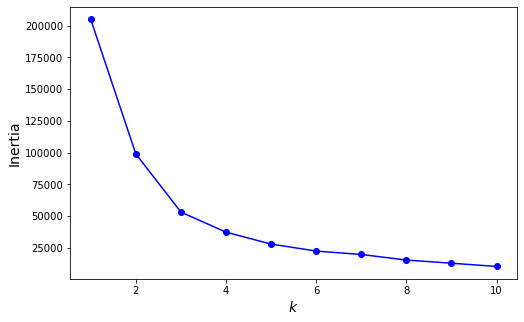

In [17]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)

plt.show()

In [18]:
model = KMeans(n_clusters=4, random_state=42)

In [19]:
# Fitting model
model.fit(crypto_TSNE)

KMeans(n_clusters=4, random_state=42)

In [20]:
# Get predictions
predictions = model.predict(crypto_TSNE)
predictions = pd.DataFrame(predictions)


In [21]:
crypto_mined2['Class'] = model.labels_
crypto_mined2

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,x,y,Class
42,Scrypt,PoW/PoS,4.199995e+01,42,20.299915,2.438020,1
404,Scrypt,PoW/PoS,1.055185e+09,532000000,20.806366,7.440047,1
1337,X13,PoW/PoS,2.927942e+10,314159265359,26.672478,15.567253,1
BTC,SHA-256,PoW,1.792718e+07,21000000,-29.299261,17.163460,2
ETH,Ethash,PoW,1.076842e+08,0,-5.355748,-17.481886,0
...,...,...,...,...,...,...,...
ZEPH,SHA-256,DPoS,2.000000e+09,2000000000,-26.364012,15.328937,2
GAP,Scrypt,PoW/PoS,1.493105e+07,250000000,23.820419,5.403740,1
BDX,CryptoNight,PoW,9.802226e+08,1400222610,-11.700278,-24.468109,0
ZEN,Equihash,PoW,7.296538e+06,21000000,-19.422518,-12.575702,0


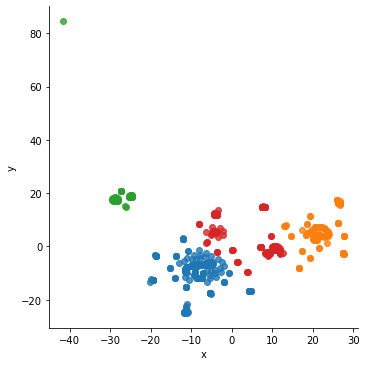

In [22]:
sns.lmplot('x', 'y', data=crypto_mined2, hue="Class", fit_reg=False, legend=False)
plt.show()

### Recommendation

Based on the visualization and analysis above, this cryptocurrencies dataset can be clustered into 4 distinct groups. I would recommand my clients at the investment bank that the cryptocurrencies can be grouped and created a classification system in order to develop a new investment portfolio for their customers.